In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", context={'axes.labelsize':18,
                                'xtick.labelsize':15,
                                'ytick.labelsize':15})
import warnings
import datetime as dt
import matplotlib.dates as mdates
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt

In [2]:
gen_2=pd.read_csv('/Users/yuyizhang/Documents/forecasting/Energy_Data/Solar Power_data/Plant_2_Generation_Data.csv')
gen_2.drop('PLANT_ID',1,inplace=True)
sens_2= pd.read_csv('/Users/yuyizhang/Documents/forecasting/Energy_Data/Solar Power_data/Plant_2_Weather_Sensor_Data.csv')
sens_2.drop('PLANT_ID',1,inplace=True)

In [3]:
#format datetime
gen_2['DATE_TIME']= pd.to_datetime(gen_2['DATE_TIME'],format='%Y-%m-%d %H:%M:%S')
sens_2['DATE_TIME']= pd.to_datetime(sens_2['DATE_TIME'],format='%Y-%m-%d %H:%M:%S')

In [4]:
gen_2

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15 00:00:00,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15 00:00:00,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,2020-05-15 00:00:00,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,2020-05-15 00:00:00,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07
...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,q49J1IKaHRwDQnt,0.0,0.0,4157.000000,5.207580e+05
67694,2020-06-17 23:45:00,rrq4fwE8jgrTyWY,0.0,0.0,3931.000000,1.211314e+08
67695,2020-06-17 23:45:00,vOuJvMaM2sgwLmb,0.0,0.0,4322.000000,2.427691e+06
67696,2020-06-17 23:45:00,xMbIugepa2P7lBB,0.0,0.0,4218.000000,1.068964e+08


In [5]:
sens_2

,DATE_TIME,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,iq8k7ZNt4Mwm3w0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,iq8k7ZNt4Mwm3w0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,iq8k7ZNt4Mwm3w0,26.596148,25.088210,0.0
...,...,...,...,...,...
3254,2020-06-17 22:45:00,iq8k7ZNt4Mwm3w0,23.511703,22.856201,0.0
3255,2020-06-17 23:00:00,iq8k7ZNt4Mwm3w0,23.482282,22.744190,0.0
3256,2020-06-17 23:15:00,iq8k7ZNt4Mwm3w0,23.354743,22.492245,0.0
3257,2020-06-17 23:30:00,iq8k7ZNt4Mwm3w0,23.291048,22.373909,0.0


In [6]:
sens_2.drop('SOURCE_KEY',1,inplace=True)
sens_2

,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,26.596148,25.088210,0.0
...,...,...,...,...
3254,2020-06-17 22:45:00,23.511703,22.856201,0.0
3255,2020-06-17 23:00:00,23.482282,22.744190,0.0
3256,2020-06-17 23:15:00,23.354743,22.492245,0.0
3257,2020-06-17 23:30:00,23.291048,22.373909,0.0


# Feature creation

In [7]:
df_plan1 = pd.merge(gen_2,sens_2,how = 'outer',on = ['DATE_TIME'])
df_plan1 = df_plan1.dropna(axis = 0, how = 'any')
df_plan1

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06,27.004764,25.060789,0.0
1,2020-05-15 00:00:00,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09,27.004764,25.060789,0.0
2,2020-05-15 00:00:00,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09,27.004764,25.060789,0.0
3,2020-05-15 00:00:00,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06,27.004764,25.060789,0.0
4,2020-05-15 00:00:00,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07,27.004764,25.060789,0.0
...,...,...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,q49J1IKaHRwDQnt,0.0,0.0,4157.000000,5.207580e+05,23.202871,22.535908,0.0
67694,2020-06-17 23:45:00,rrq4fwE8jgrTyWY,0.0,0.0,3931.000000,1.211314e+08,23.202871,22.535908,0.0
67695,2020-06-17 23:45:00,vOuJvMaM2sgwLmb,0.0,0.0,4322.000000,2.427691e+06,23.202871,22.535908,0.0
67696,2020-06-17 23:45:00,xMbIugepa2P7lBB,0.0,0.0,4218.000000,1.068964e+08,23.202871,22.535908,0.0


In [8]:
class_mapping = {'4UPUqMRk7TRMgml':0, '81aHJ1q11NBPMrL':1, '9kRcWv60rDACzjR':2,
                 'Et9kgGMDl729KT4':3, 'IQ2d7wF4YD8zU1Q':4, 'LYwnQax7tkwH5Cb':5,
                 'LlT2YUhhzqhg5Sw':6, 'Mx2yZCDsyf6DPfv':7, 'NgDl19wMapZy17u':8,
                 'PeE6FRyGXUgsRhN':9, 'Qf4GUc1pJu5T6c6':10, 'Quc1TzYxW2pYoWX':11,
                 'V94E5Ben1TlhnDV':12, 'WcxssY2VbP4hApt':13, 'mqwcsP2rE7J0TFp':14,
                 'oZ35aAeoifZaQzV':15, 'oZZkBaNadn6DNKz':16, 'q49J1IKaHRwDQnt':17,
                 'rrq4fwE8jgrTyWY':18, 'vOuJvMaM2sgwLmb':19, 'xMbIugepa2P7lBB':20,
                 'xoJJ8DcxJEcupym':21}

df_plan1['SOURCE_KEY'] = df_plan1['SOURCE_KEY'].map(class_mapping)

In [9]:
df_plan1

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,0,0.0,0.0,9425.000000,2.429011e+06,27.004764,25.060789,0.0
1,2020-05-15 00:00:00,1,0.0,0.0,0.000000,1.215279e+09,27.004764,25.060789,0.0
2,2020-05-15 00:00:00,2,0.0,0.0,3075.333333,2.247720e+09,27.004764,25.060789,0.0
3,2020-05-15 00:00:00,3,0.0,0.0,269.933333,1.704250e+06,27.004764,25.060789,0.0
4,2020-05-15 00:00:00,4,0.0,0.0,3177.000000,1.994153e+07,27.004764,25.060789,0.0
...,...,...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,17,0.0,0.0,4157.000000,5.207580e+05,23.202871,22.535908,0.0
67694,2020-06-17 23:45:00,18,0.0,0.0,3931.000000,1.211314e+08,23.202871,22.535908,0.0
67695,2020-06-17 23:45:00,19,0.0,0.0,4322.000000,2.427691e+06,23.202871,22.535908,0.0
67696,2020-06-17 23:45:00,20,0.0,0.0,4218.000000,1.068964e+08,23.202871,22.535908,0.0


In [10]:
# Below function extracts date related features from datetime
def create_date_featues(df):

    df['Year'] = pd.to_datetime(df_plan1['DATE_TIME']).dt.year
    df['Month'] = pd.to_datetime(df_plan1['DATE_TIME']).dt.month
    df['Day'] = pd.to_datetime(df_plan1['DATE_TIME']).dt.day
    df['Hour'] = pd.to_datetime(df_plan1['DATE_TIME']).dt.hour
    df['Minute'] = pd.to_datetime(df_plan1['DATE_TIME']).dt.minute
    
    return df

In [11]:
df_plan1=create_date_featues(df_plan1)
df_plan1.head()

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,Year,Month,Day,Hour,Minute
0,2020-05-15,0,0.0,0.0,9425.000000,2.429011e+06,27.004764,25.060789,0.0,2020,5,15,0,0
1,2020-05-15,1,0.0,0.0,0.000000,1.215279e+09,27.004764,25.060789,0.0,2020,5,15,0,0
2,2020-05-15,2,0.0,0.0,3075.333333,2.247720e+09,27.004764,25.060789,0.0,2020,5,15,0,0
3,2020-05-15,3,0.0,0.0,269.933333,1.704250e+06,27.004764,25.060789,0.0,2020,5,15,0,0
4,2020-05-15,4,0.0,0.0,3177.000000,1.994153e+07,27.004764,25.060789,0.0,2020,5,15,0,0


In [12]:
train_df_plan1 = df_plan1[df_plan1['DATE_TIME']<'2020-06-09 00:00']
test_df_plan1 = df_plan1[df_plan1['DATE_TIME']>='2020-06-09 00:00']

x_df_train = train_df_plan1.drop(columns={'DATE_TIME','DC_POWER','AC_POWER','DAILY_YIELD','TOTAL_YIELD'},axis=1)
y_df_train = train_df_plan1.loc[:,['DAILY_YIELD']]

x_df_val=test_df_plan1.drop(columns={'DATE_TIME','DC_POWER','AC_POWER','DAILY_YIELD','TOTAL_YIELD'},axis=1)
y_df_val=test_df_plan1.loc[:,['DAILY_YIELD']]

In [13]:
x_df_train

,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,Year,Month,Day,Hour,Minute
0,0,27.004764,25.060789,0.0,2020,5,15,0,0
1,1,27.004764,25.060789,0.0,2020,5,15,0,0
2,2,27.004764,25.060789,0.0,2020,5,15,0,0
3,3,27.004764,25.060789,0.0,2020,5,15,0,0
4,4,27.004764,25.060789,0.0,2020,5,15,0,0
...,...,...,...,...,...,...,...,...,...
48685,17,25.251448,23.655589,0.0,2020,6,8,23,45
48686,18,25.251448,23.655589,0.0,2020,6,8,23,45
48687,19,25.251448,23.655589,0.0,2020,6,8,23,45
48688,20,25.251448,23.655589,0.0,2020,6,8,23,45


# Lightgbm

In [14]:
import lightgbm as lgb

model_lgb_df = lgb.LGBMRegressor(objective='regression')
model_lgb_df.fit(x_df_train, y_df_train,eval_metric="rmse", 
    eval_set=[(x_df_train, y_df_train)], 
    verbose=False, 
    early_stopping_rounds = 1000)

LGBMRegressor(objective='regression')

In [15]:
pred_lgb_df=model_lgb_df.predict(x_df_val)
r2_score(y_df_val,pred_lgb_df)

0.2927396489922415

In [16]:
np.sqrt(mean_squared_error(y_df_val,pred_lgb_df))

2002.3882826686377

# Xgboost

In [108]:
import xgboost as xgb
from xgboost import XGBRegressor
from xgboost import plot_importance

model_xgb = XGBRegressor(
    max_depth=8,
    booster = "gbtree",
    n_estimators=1000,
    min_child_weight=300, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.3,
    seed=42,
    objective='reg:linear')

model_xgb.fit(
    x_df_train, 
    y_df_train, 
    eval_metric="rmse", 
    eval_set=[(x_df_train, y_df_train),(x_df_val,y_df_val)], 
    verbose=False, 
    early_stopping_rounds = 100)

[21:36:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.8, eta=0.3, max_depth=8, min_child_weight=300,
             n_estimators=1000, seed=42, subsample=0.8)

In [109]:
pred_xgb=model_xgb.predict(x_df_val)
r2_score(y_df_val,pred_xgb)

0.47725046587643516

In [110]:
np.sqrt(mean_squared_error(y_df_val,pred_xgb))

1721.4938136422418

# Catboost

In [20]:
from catboost import CatBoostRegressor
model_cat = CatBoostRegressor(depth=10, learning_rate=0.1, eval_metric='RMSE')

model_cat.fit(x_df_train, y_df_train, 
    eval_set=[(x_df_train, y_df_train)], 
    verbose=False, 
    early_stopping_rounds = 100)

In [23]:
pred_cat=model_cat.predict(x_df_val)
r2_score(y_df_val,pred_cat)

0.19243977335299622

In [24]:
np.sqrt(mean_squared_error(y_df_val,pred_cat))

2139.6665622283094

# Explanation
# SHAP for LightGBM

In [45]:
import shap
explainer_lgb = shap.TreeExplainer(model_lgb_df)
shap_values_lgb = explainer_lgb(x_df_train)

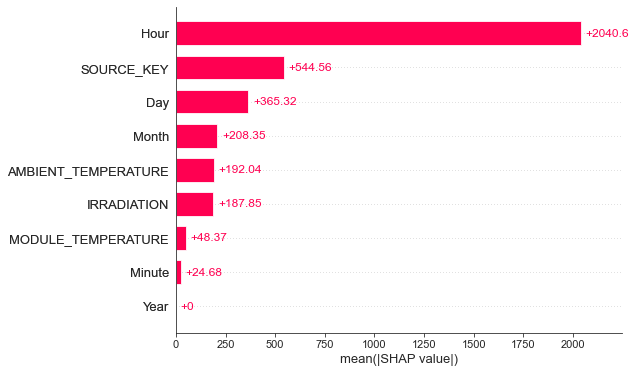

In [134]:
shap.plots.bar(shap_values_lgb)

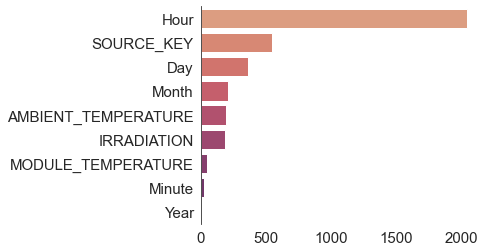

In [146]:
#Adjusted to a more suitable form for the paper
fig = plt.figure(figsize=(5,4))

x = [2040.6, 544.56, 365.32, 208.35, 192.04, 187.85, 48.37, 24.68, 0]
y = ['Hour','SOURCE_KEY','Day','Month','AMBIENT_TEMPERATURE','IRRADIATION','MODULE_TEMPERATURE','Minute','Year']

sns.barplot(x,y, palette="flare")

sns.despine(bottom=True)
plt.show()

# FI-SHAP for LightGBM

In [60]:
shap_pd_lgb = pd.DataFrame(shap_values_lgb.values)

In [61]:
shap_pd_lgb.head()

,0,1,2,3,4,5,6,7,8
0,2629.987904,130.025742,-26.820416,308.767613,0.0,-582.658002,-208.539550,523.753258,96.737381
1,-1071.057219,-34.440033,-13.907769,114.321307,0.0,-248.976942,169.524253,-1826.186382,140.550646
2,-685.333105,-97.606373,23.537751,147.819738,0.0,-141.468906,244.593784,-1908.651746,233.044521
3,-1014.255469,-75.654883,20.251770,157.605540,0.0,-389.060955,185.820325,-1450.154997,229.043741
4,593.432066,-22.159089,33.799101,229.374240,0.0,-807.397290,376.851181,-1697.348072,349.855873


In [62]:
df_lgb_global = pd.DataFrame()


for n in range(0, len(shap_pd_lgb.columns)):
    shap_values_update = []
    each_shap_value = (abs(shap_pd_lgb[n]).sum())/len(shap_pd_lgb)
        
    shap_values_update.append(each_shap_value)
    
    df_lgb_global[n] = shap_values_update
    del shap_values_update

In [64]:
df_lgb_global.columns= x_df_train.columns

In [65]:
df_lgb_global #Check if the result is correct

,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,Year,Month,Day,Hour,Minute
0,544.556488,192.044245,48.370441,187.845255,0.0,208.347634,365.315284,2040.603311,24.681695


<Figure size 864x432 with 0 Axes>

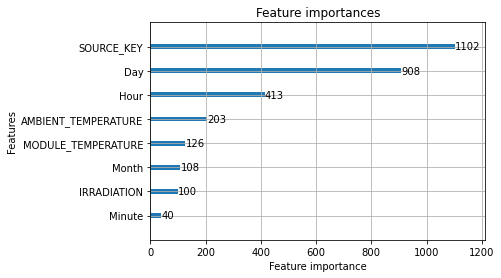

In [72]:
#FI for lightgbm
plt.figure(figsize=(12,6))
lgb.plot_importance(model_lgb_df, max_num_features=30)
plt.title("Feature importances")
plt.show()

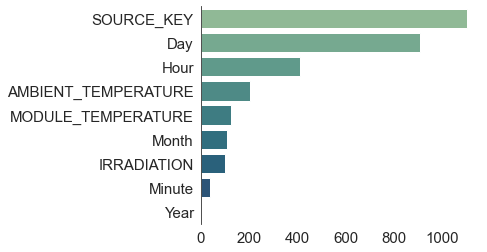

In [144]:
fig = plt.figure(figsize=(5,4))

x = [1102, 908, 413, 203, 126, 108, 100, 40, 0]

y = ['SOURCE_KEY','Day','Hour','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','Month','IRRADIATION','Minute','Year']


sns.barplot(x,y, palette="crest")

sns.despine(bottom=True)
plt.show()

In [67]:
df_lgb_global['SOURCE_KEY'] = df_lgb_global['SOURCE_KEY']* (1102/3000)

In [68]:
df_lgb_global['Day'] = df_lgb_global['Day']* (908/3000)
df_lgb_global['Hour'] = df_lgb_global['Hour']* (413/3000)
df_lgb_global['AMBIENT_TEMPERATURE'] = df_lgb_global['AMBIENT_TEMPERATURE']* (203/3000)
df_lgb_global['MODULE_TEMPERATURE'] = df_lgb_global['MODULE_TEMPERATURE']* (126/3000)
df_lgb_global['Month'] = df_lgb_global['Month']* (108/3000)
df_lgb_global['IRRADIATION'] = df_lgb_global['IRRADIATION']* (100/3000)
df_lgb_global['Minute'] = df_lgb_global['Minute']* (40/3000)

In [75]:
df_lgb_global = df_lgb_global.T

In [77]:
df_lgb_global.columns = ["FI-SHAP values"]

In [79]:
data_1 = df_lgb_global.sort_values(by = ['FI-SHAP values'], ascending = False)

In [80]:
data_1

,FI-SHAP values
Hour,280.923056
SOURCE_KEY,200.033750
Day,110.568759
AMBIENT_TEMPERATURE,12.994994
Month,7.500515
IRRADIATION,6.261508
MODULE_TEMPERATURE,2.031559
Minute,0.329089
Year,0.000000


In [83]:
columns = list(data_1.T.columns)

In [84]:
columns

['Hour',
 'SOURCE_KEY',
 'Day',
 'AMBIENT_TEMPERATURE',
 'Month',
 'IRRADIATION',
 'MODULE_TEMPERATURE',
 'Minute',
 'Year']

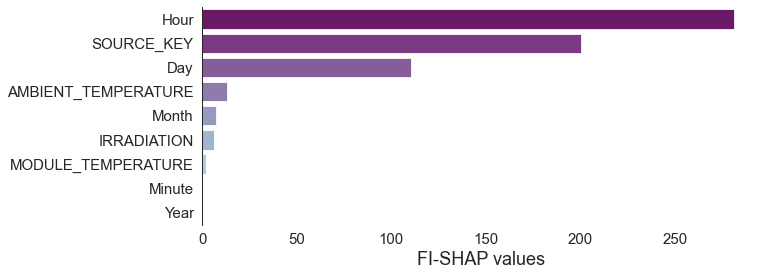

In [98]:
fig = plt.figure(figsize=(10,4))
 
sns.barplot(data_1['FI-SHAP values'],columns, palette="BuPu_r")

sns.despine(bottom=True)
plt.show()

# SHAP for Xgboost

In [100]:
explainer_xgb = shap.TreeExplainer(model_xgb)
shap_values_xgb = explainer_xgb(x_df_train,check_additivity=False)

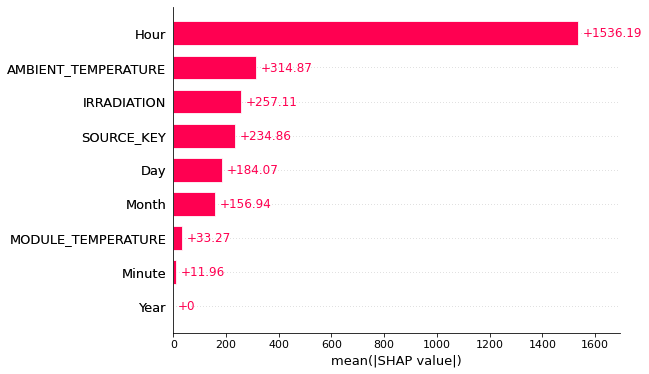

In [102]:
shap.plots.bar(shap_values_xgb)

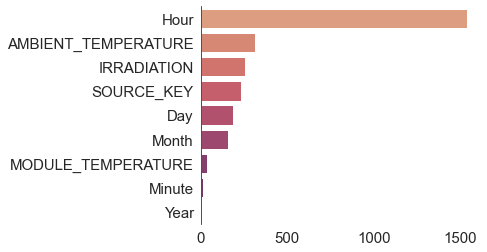

In [152]:
#Adjusted to a more suitable form for the paper
fig = plt.figure(figsize=(5,4))

x = [1536.19, 314.87, 257.11, 234.86, 184.07, 156.94, 33.27, 11.96, 0]
y = ['Hour','AMBIENT_TEMPERATURE','IRRADIATION','SOURCE_KEY','Day','Month','MODULE_TEMPERATURE','Minute','Year']

sns.barplot(x,y, palette="flare")
sns.despine(bottom=True)

plt.show()

# FI-SHAP for Xgboost

In [103]:
shap_pd_xgb = pd.DataFrame(shap_values_xgb.values)

df_xgb_global = pd.DataFrame()


for n in range(0, len(shap_pd_xgb.columns)):
    shap_values_update = []
    each_shap_value = (abs(shap_pd_xgb[n]).sum())/len(shap_pd_xgb)
        
    shap_values_update.append(each_shap_value)
    
    df_xgb_global[n] = shap_values_update
    del shap_values_update
    
df_xgb_global.columns= x_df_train.columns

In [105]:
df_xgb_global

,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,Year,Month,Day,Hour,Minute
0,234.865517,314.869501,33.265596,257.113288,0.0,156.941713,184.074718,1536.192565,11.959717


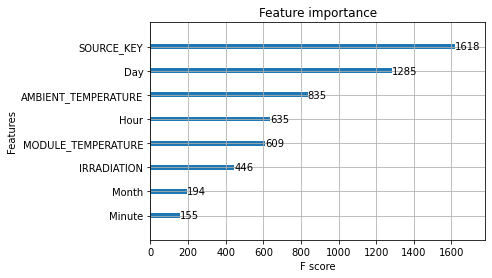

In [111]:
from xgboost import plot_importance
plot_importance(model_xgb)
plt.show()

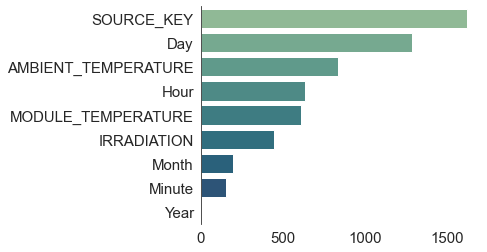

In [154]:
fig = plt.figure(figsize=(5,4))

x = [1618, 1285, 835, 635, 609, 446, 194, 155, 0]
y = ['SOURCE_KEY','Day','AMBIENT_TEMPERATURE','Hour','MODULE_TEMPERATURE','IRRADIATION','Month','Minute','Year']


sns.barplot(x,y, palette="crest")

sns.despine(bottom=True)
plt.show()

In [112]:
df_xgb_global['SOURCE_KEY'] = df_xgb_global['SOURCE_KEY']* (1618/5777)
df_xgb_global['Day'] = df_xgb_global['Day']* (1285/5777)
df_xgb_global['AMBIENT_TEMPERATURE'] = df_xgb_global['AMBIENT_TEMPERATURE']* (835/5777)
df_xgb_global['Hour'] = df_xgb_global['Hour']* (635/5777)
df_xgb_global['MODULE_TEMPERATURE'] = df_xgb_global['MODULE_TEMPERATURE']* (609/5777)
df_xgb_global['IRRADIATION'] = df_xgb_global['IRRADIATION']* (446/5777)
df_xgb_global['Month'] = df_xgb_global['Month']* (194/5777)
df_xgb_global['Minute'] = df_xgb_global['Minute']* (155/5777)

In [113]:
df_xgb_global = df_xgb_global.T
df_xgb_global.columns = ["FI-SHAP values"]
data_2 = df_xgb_global.sort_values(by = ['FI-SHAP values'], ascending = False)
columns = list(data_2.T.columns)

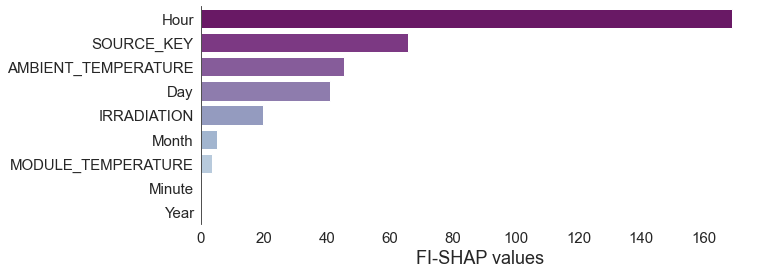

In [116]:
fig = plt.figure(figsize=(10,4))
 
sns.barplot(data_2['FI-SHAP values'],columns, palette="BuPu_r")

sns.despine(bottom=True)
plt.show()

# SHAP for Catboost

In [117]:
explainer_cat = shap.TreeExplainer(model_cat)
shap_values_cat = explainer_cat(x_df_train)

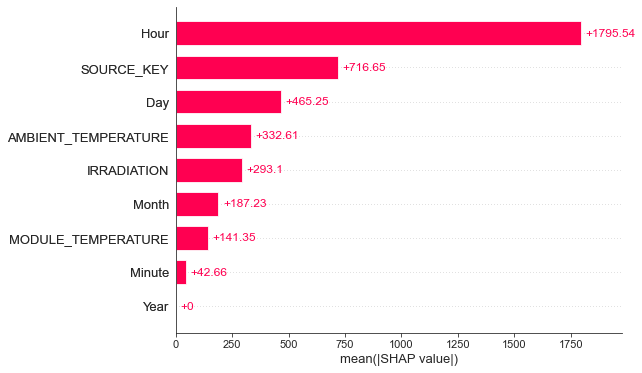

In [119]:
shap.plots.bar(shap_values_cat)

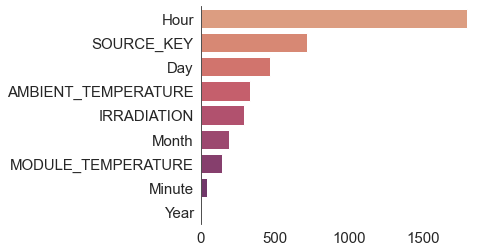

In [155]:
#Adjusted to a more suitable form for the paper
fig = plt.figure(figsize=(5,4))

x = [1795.54, 716.65, 465.25, 332.61, 293.1, 187.23, 141.35, 42.66, 0]
y = ['Hour','SOURCE_KEY','Day','AMBIENT_TEMPERATURE','IRRADIATION','Month','MODULE_TEMPERATURE','Minute','Year']

sns.barplot(x,y, palette="flare")
sns.despine(bottom=True)

plt.show()

# FI-SHAP for Catboost

In [120]:
shap_pd_cat = pd.DataFrame(shap_values_cat.values)

df_cat_global = pd.DataFrame()


for n in range(0, len(shap_pd_cat.columns)):
    shap_values_update = []
    each_shap_value = (abs(shap_pd_cat[n]).sum())/len(shap_pd_cat)
        
    shap_values_update.append(each_shap_value)
    
    df_cat_global[n] = shap_values_update
    del shap_values_update
    
df_cat_global.columns= x_df_train.columns

In [121]:
df_cat_global

,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,Year,Month,Day,Hour,Minute
0,716.645943,332.613381,141.347528,293.10318,0.0,187.228278,465.246552,1795.535339,42.661495


In [122]:
def plot_feature_importance(importance,names,model_type):
    
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    
    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

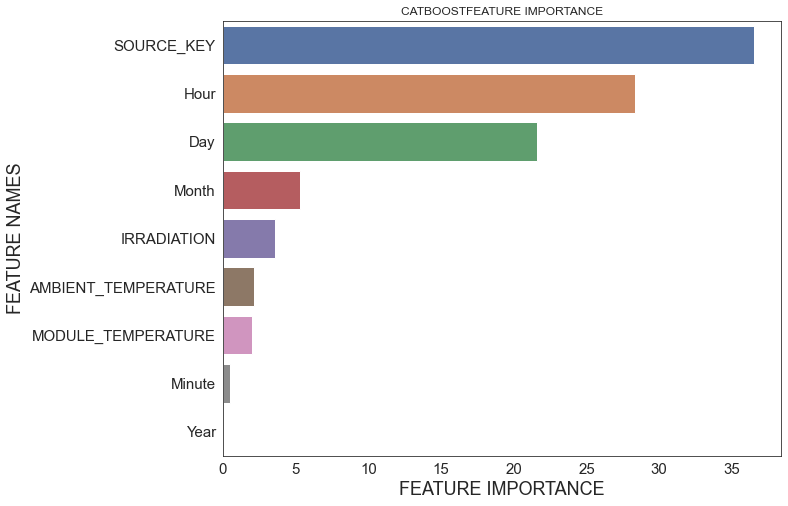

In [123]:
plot_feature_importance(model_cat.get_feature_importance(),x_df_train.columns,'CATBOOST')

In [125]:
feature_cat = model_cat.get_feature_importance()
feature_cat.sort()
print(feature_cat)

[ 0.          0.49206197  2.02298209  2.13618367  3.57610263  5.28358063
 21.59695446 28.36110597 36.53102858]


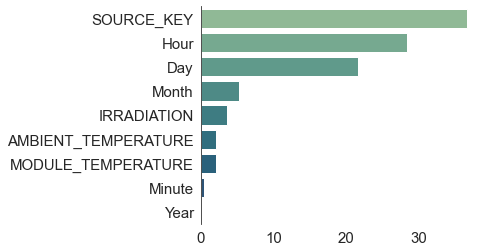

In [156]:
fig = plt.figure(figsize=(5,4))

x = [36.53, 28.36, 21.60, 5.28, 3.58, 2.14, 2.02, 0.49, 0]
y = ['SOURCE_KEY','Hour','Day','Month','IRRADIATION','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','Minute','Year']

sns.barplot(x,y, palette="crest")

sns.despine(bottom=True)
plt.show()

In [129]:
df_cat_global['SOURCE_KEY'] = df_cat_global['SOURCE_KEY']* (feature_cat[8]/sum(feature_cat))
df_cat_global['Hour'] = df_cat_global['Hour']* (feature_cat[7]/sum(feature_cat))
df_cat_global['Day'] = df_cat_global['Day']* (feature_cat[6]/sum(feature_cat))
df_cat_global['Month'] = df_cat_global['Month']* (feature_cat[5]/sum(feature_cat))
df_cat_global['IRRADIATION'] = df_cat_global['IRRADIATION']* (feature_cat[4]/sum(feature_cat))
df_cat_global['AMBIENT_TEMPERATURE'] = df_cat_global['AMBIENT_TEMPERATURE']* (feature_cat[3]/sum(feature_cat))
df_cat_global['MODULE_TEMPERATURE'] = df_cat_global['MODULE_TEMPERATURE']* (feature_cat[2]/sum(feature_cat))
df_cat_global['Minute'] = df_cat_global['Minute']* (feature_cat[1]/sum(feature_cat))

In [130]:
df_cat_global = df_cat_global.T
df_cat_global.columns = ["FI-SHAP values"]
data_3 = df_cat_global.sort_values(by = ['FI-SHAP values'], ascending = False)
columns = list(data_3.T.columns)

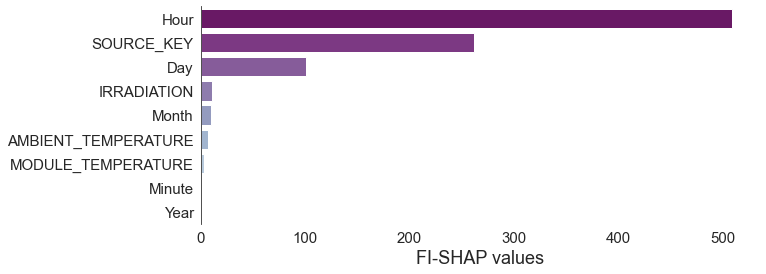

In [131]:
fig = plt.figure(figsize=(10,4))
 
sns.barplot(data_3['FI-SHAP values'],columns, palette="BuPu_r")

sns.despine(bottom=True)
plt.show()

# LIME for Lightgbm

In [135]:
x_df_train.columns

Index(['SOURCE_KEY', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE',
       'IRRADIATION', 'Year', 'Month', 'Day', 'Hour', 'Minute'],
      dtype='object')

In [140]:
len(x_df_train)

48690

In [136]:
cols = ['SOURCE_KEY','AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION', 'Year',
       'Month', 'Day', 'Hour', 'Minute']

In [137]:
import lime
from lime import lime_tabular

lightgbm_lime = lime.lime_tabular.LimeTabularExplainer(np.array(x_df_train),
                    feature_names = cols,
                    class_names=['None'],                                
                    verbose=True, mode='regression')

Intercept 4210.929140677984
Prediction_local [1643.99320784]
Right: 804.2031275311731


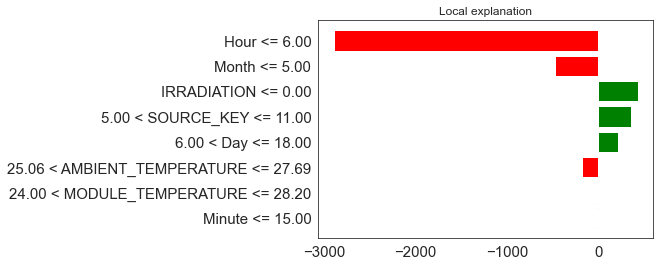

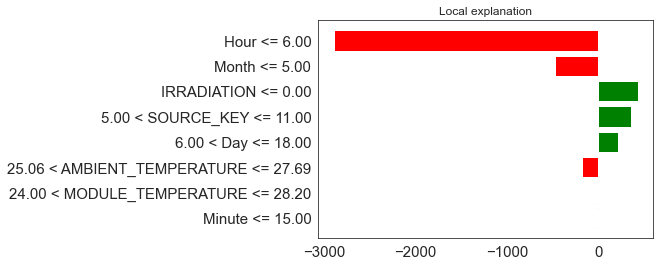

In [138]:
exp_lgb = lightgbm_lime.explain_instance(x_df_train.iloc[10], 
     model_lgb_df.predict, num_features=8)
exp_lgb.as_pyplot_figure()

In [139]:
pd.DataFrame(exp_lgb.as_list())

,0,1
0,Hour <= 6.00,-2898.739245
1,Month <= 5.00,-472.571849
2,IRRADIATION <= 0.00,434.612463
3,5.00 < SOURCE_KEY <= 11.00,353.803934
4,6.00 < Day <= 18.00,220.450275
5,25.06 < AMBIENT_TEMPERATURE <= 27.69,-175.191876
6,24.00 < MODULE_TEMPERATURE <= 28.20,-16.461451
7,Minute <= 15.00,-12.838184


# LIME for Xgboost

Intercept 3431.716641141181
Prediction_local [1653.65615772]
Right: 1675.8202


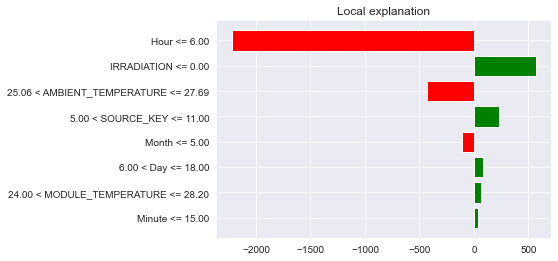

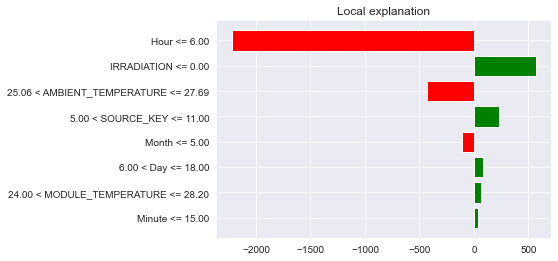

In [102]:
exp_xgb = lightgbm_lime.explain_instance(x_df_train.iloc[10], 
     model_xgb.predict, num_features=8)
exp_xgb.as_pyplot_figure()

In [103]:
pd.DataFrame(exp_xgb.as_list())

,0,1
0,Hour <= 6.00,-2224.403019
1,IRRADIATION <= 0.00,568.586051
2,25.06 < AMBIENT_TEMPERATURE <= 27.69,-427.359487
3,5.00 < SOURCE_KEY <= 11.00,229.851978
4,Month <= 5.00,-107.145735
5,6.00 < Day <= 18.00,86.999893
6,24.00 < MODULE_TEMPERATURE <= 28.20,61.825862
7,Minute <= 15.00,33.583973


# LIME for Catboost

Intercept 4024.789562897874
Prediction_local [2136.55114396]
Right: 523.5087070333702


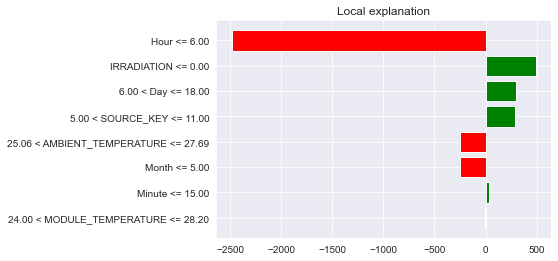

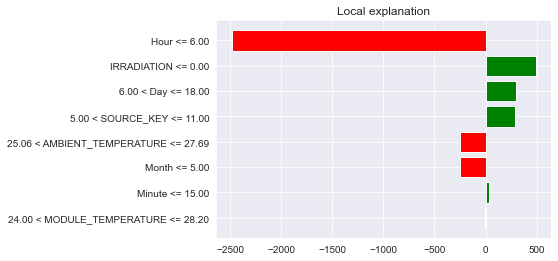

In [104]:
exp_cat = lightgbm_lime.explain_instance(x_df_train.iloc[10], 
     model_cat.predict, num_features=8)
exp_cat.as_pyplot_figure()

In [105]:
pd.DataFrame(exp_cat.as_list())

,0,1
0,Hour <= 6.00,-2486.131553
1,IRRADIATION <= 0.00,492.746035
2,6.00 < Day <= 18.00,296.169140
3,5.00 < SOURCE_KEY <= 11.00,291.563793
4,25.06 < AMBIENT_TEMPERATURE <= 27.69,-254.033649
5,Month <= 5.00,-252.845560
6,Minute <= 15.00,31.422332
7,24.00 < MODULE_TEMPERATURE <= 28.20,-7.128956


# Feature importance for lightgbm

<Figure size 864x432 with 0 Axes>

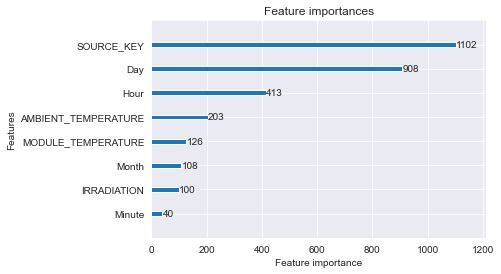

In [106]:
plt.figure(figsize=(12,6))
lgb.plot_importance(model_lgb_df, max_num_features=30)
plt.title("Feature importances")
plt.show()

# Feature importance for xgboost

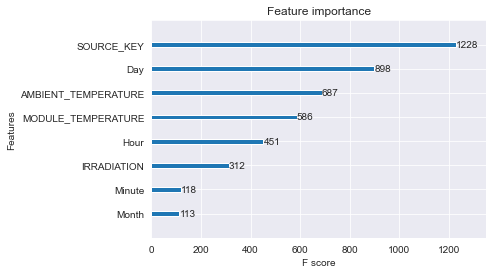

In [107]:
from xgboost import plot_importance
plot_importance(model_xgb)
plt.show()

# Feature importance for catboost

In [108]:
def plot_feature_importance(importance,names,model_type):
    
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    
    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

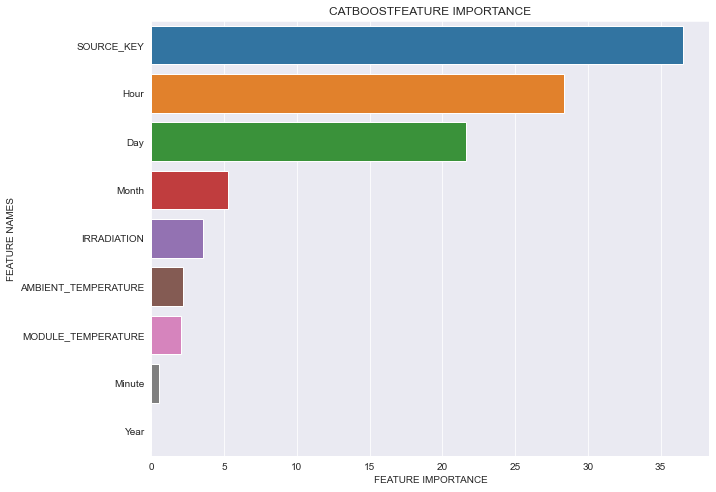

In [109]:
plot_feature_importance(model_cat.get_feature_importance(),x_df_train.columns,'CATBOOST')

In [110]:
feature_cat = model_cat.get_feature_importance()

In [111]:
feature_cat.sort()
print(feature_cat)

[ 0.          0.49206197  2.02298209  2.13618367  3.57610263  5.28358063
 21.59695446 28.36110597 36.53102858]


# FI-SHAP

Text(0, 0.5, 'FEATURE NAMES')

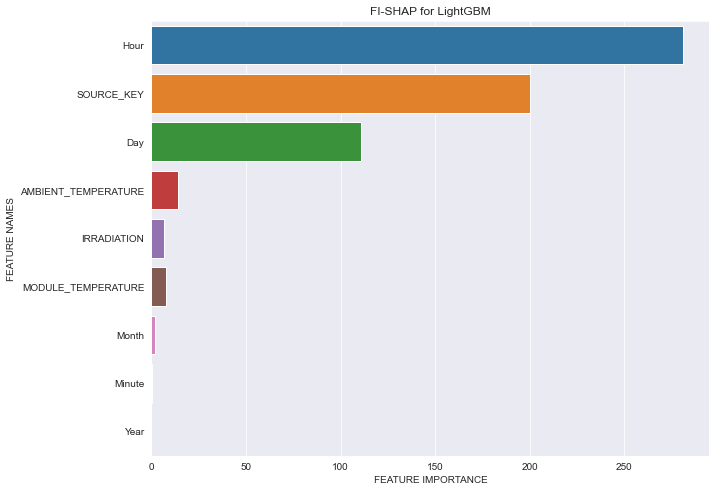

In [112]:
FI_LGBM = pd.read_csv('/Users/yuyizhang/Documents/paper/07.2021/FI_SHAP/plant2lightgbm.csv')

plt.figure(figsize=(10,8))
sns.barplot(x=FI_LGBM['values'], y=FI_LGBM['features'])

plt.title('FI-SHAP for LightGBM')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')

Text(0, 0.5, 'FEATURE NAMES')

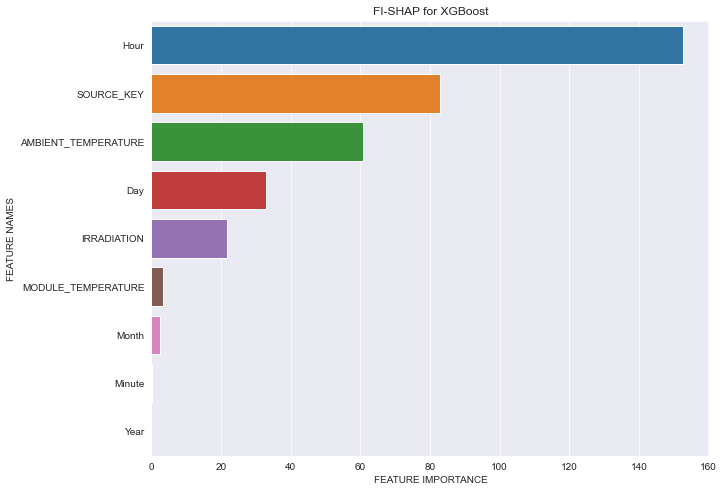

In [115]:
FI_XGB = pd.read_csv ('/Users/yuyizhang/Documents/paper/07.2021/FI_SHAP/plant2xgboost.csv')

plt.figure(figsize=(10,8))
sns.barplot(x=FI_XGB['values'], y=FI_XGB['features'])

plt.title('FI-SHAP for XGBoost')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')

Text(0, 0.5, 'FEATURE NAMES')

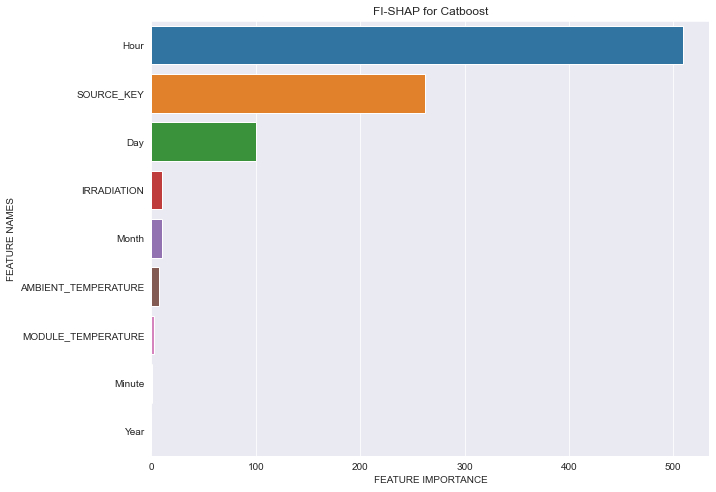

In [116]:
FI_CAT = pd.read_csv ('/Users/yuyizhang/Documents/paper/07.2021/FI_SHAP/plant2catboost.csv')

plt.figure(figsize=(10,8))
sns.barplot(x=FI_CAT['values'], y=FI_CAT['features'])

plt.title('FI-SHAP for Catboost')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')

# FI-LIME

Text(0, 0.5, 'FEATURE NAMES')

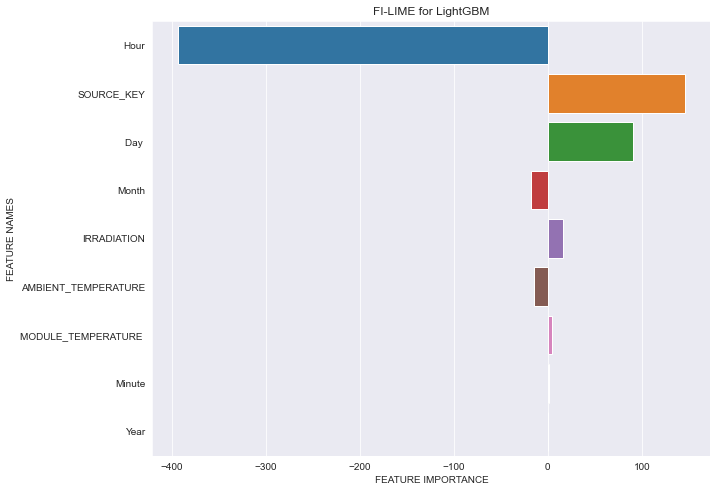

In [117]:
lime_lgbm = pd.read_csv ('/Users/yuyizhang/Documents/paper/07.2021/FI-LIME/plant2limelgbm.csv')

plt.figure(figsize=(10,8))
sns.barplot(x=lime_lgbm['values'], y=lime_lgbm['features'])

plt.title('FI-LIME for LightGBM')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')

Text(0, 0.5, 'FEATURE NAMES')

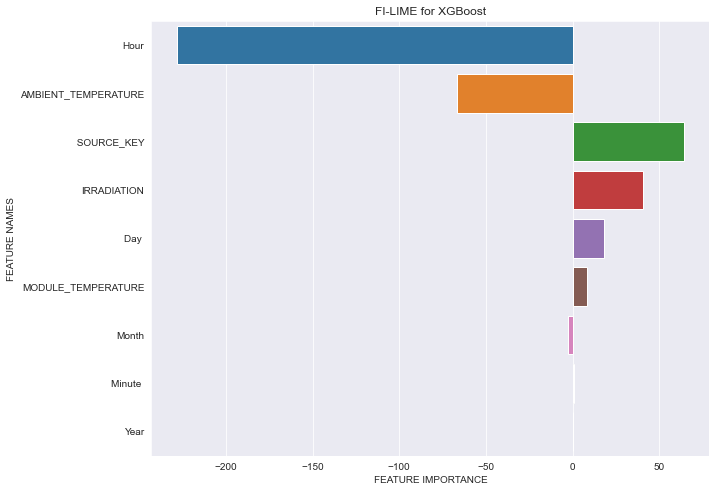

In [33]:
lime_xgb = pd.read_csv ('/Users/yuyizhang/Documents/paper/07.2021/FI-LIME/plant2limexgb.csv')

plt.figure(figsize=(10,8))
sns.barplot(x=lime_xgb['values'], y=lime_xgb['features'])

plt.title('FI-LIME for XGBoost')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')

Text(0, 0.5, 'FEATURE NAMES')

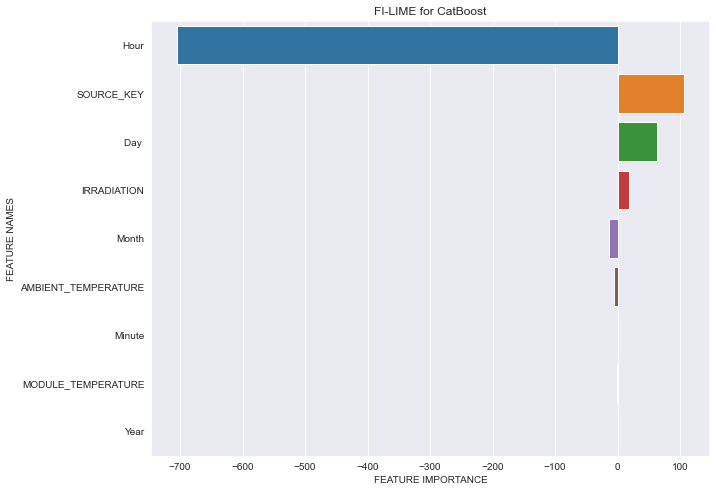

In [119]:
lime_cat = pd.read_csv ('/Users/yuyizhang/Documents/paper/07.2021/FI-LIME/plant2limecat.csv')

plt.figure(figsize=(10,8))
sns.barplot(x=lime_cat['values'], y=lime_cat['features'])

plt.title('FI-LIME for CatBoost')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')